Found 2040 files belonging to 30 classes.
Found 240 files belonging to 30 classes.
Found 240 files belonging to 30 classes.
Visualizing Data Augmentation... (A plot should appear)


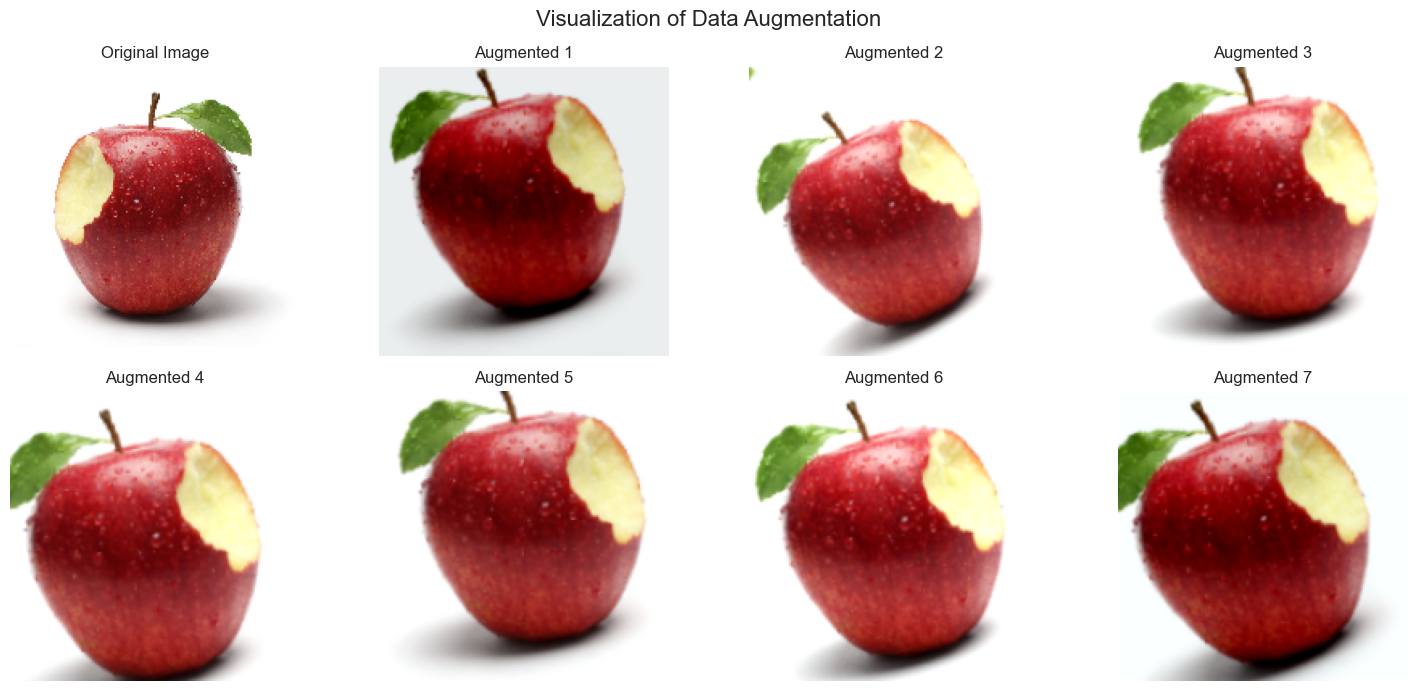

Data augmentation visualization complete.


In [11]:
# Data Process
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import  load_img, img_to_array
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

img_width = 180
img_height = 180

#Define a DATA AUGMENTATION SEQUENTIAL
def augment_data(image, label):
    return data_augmentation(image, training=True), label
data_augmentation = tf.keras.Sequential([
    #layers.Rescaling(1.0 / 255),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.08),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.2),
    layers.RandomContrast(0.2),
    layers.RandomCrop(img_height - 20, img_width - 20),
    layers.Resizing(img_height, img_width),
], name="data_augmentation_pipeline")
AUTOTUNE = tf.data.AUTOTUNE

#Import Data
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False)
data_cat = data_train.class_names
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size = (img_width, img_height),
                                                       batch_size = 32,
                                                       shuffle = False,
                                                       validation_split = False)
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size = (img_width, img_height),
    batch_size = 32,
    shuffle = False,
    validation_split = False
)



# Cache
data_train = data_train.map(augment_data, num_parallel_calls=AUTOTUNE)
data_train = data_train.cache().shuffle(1000)
data_train = data_train.prefetch(AUTOTUNE)

data_val = data_val.cache().prefetch(buffer_size=AUTOTUNE)
data_test = data_test.cache().prefetch(buffer_size=AUTOTUNE)

# Visualize Data Augmentation For Demo
print("Visualizing Data Augmentation... (A plot should appear)")
sample_img_path = Path(data_train_path) / "apple" / "Image_1.jpg"

if sample_img_path.exists():
    sample_img = load_img(sample_img_path, target_size=(img_height, img_width))
    sample_array = img_to_array(sample_img)
    sample_array = np.expand_dims(sample_array, 0)

    plt.figure(figsize=(15, 7))
    plt.suptitle("Visualization of Data Augmentation", fontsize=16)

    plt.subplot(2, 4, 1)
    plt.imshow(sample_img)
    plt.title("Original Image")
    plt.axis('off')

    i = 2
    for _ in range(7):
        augmented = data_augmentation(sample_array, training=True)[0]
        plt.subplot(2, 4, i)
        plt.imshow(augmented.numpy().astype("uint8"))
        plt.title(f"Augmented {i-1}")
        plt.axis('off')
        i += 1
        if i > 8:
         break
    plt.tight_layout()
    plt.show()
    print("Data augmentation visualization complete.")
else:
    print(f"Warning: Sample image not found at {sample_img_path}. Skipping augmentation visualization.")


In [33]:
# Custom CNN_Model_1

model = Sequential([
    layers.Rescaling(1.0 / 255),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128),
    layers.Dense(len(data_cat)),
])
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
epochs_size = 15
print("Setting up callbacks (EarlyStopping, ModelCheckpoint)...")


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_model_custom_cnn.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

print("--- Starting Model Training ---")
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size, batch_size=32, callbacks=[early_stopping, model_checkpoint])
# print("\n--- Model Summary ---")
# model.summary()
# print("---------------------\n")

Setting up callbacks (EarlyStopping, ModelCheckpoint)...
--- Starting Model Training ---
Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.0506 - loss: 3.7434
Epoch 1: val_accuracy improved from None to 0.10417, saving model to best_model_custom_cnn.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 141ms/step - accuracy: 0.0735 - loss: 3.3887 - val_accuracy: 0.1042 - val_loss: 3.1620
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.2014 - loss: 2.7112
Epoch 2: val_accuracy improved from 0.10417 to 0.21250, saving model to best_model_custom_cnn.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.2338 - loss: 2.6184 - val_accuracy: 0.2125 - val_loss: 2.7726
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.3643 - loss: 2.1724
Epoch 3: val_accuracy did not improve from 0.21250
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.3598 - loss: 2.1776 - val_accuracy: 0.1875 - val_loss: 2.6742
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - ac


Evaluating Model 1...
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step

       MODEL 1 ACCURACY: 0.2750       

Classification Report for CNN Model 1:                precision    recall  f1-score   support

        apple       0.40      0.25      0.31         8
       banana       0.00      0.00      0.00         8
     beetroot       0.50      0.25      0.33         8
  bell pepper       0.00      0.00      0.00         8
      cabbage       0.18      0.25      0.21         8
       carrot       0.36      0.62      0.45         8
  cauliflower       0.33      0.25      0.29         8
chilli pepper       0.00      0.00      0.00         8
     cucumber       0.31      0.50      0.38         8
     eggplant       0.29      0.50      0.36         8
       garlic       0.25      0.25      0.25         8
       ginger       0.75      0.38      0.50         8
       grapes       0.43      0.38      0.40         8
         kiwi       0.00      0.00      0.00         8
        lemon       0.17      0.

D:\Anaconda\envs\pytorch310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Anaconda\envs\pytorch310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Anaconda\envs\pytorch310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


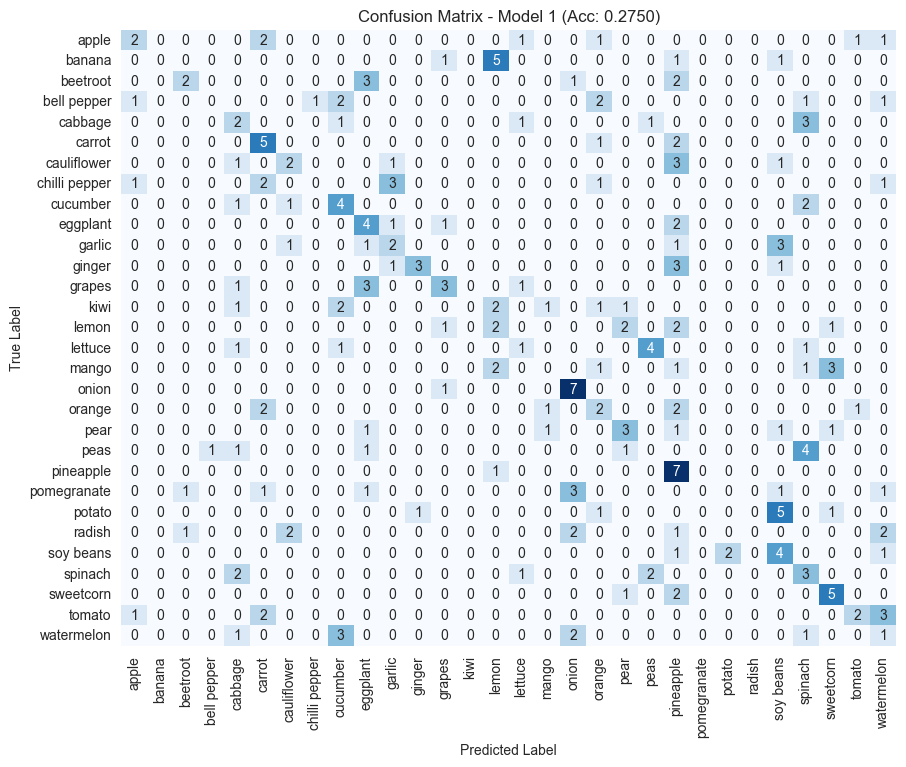

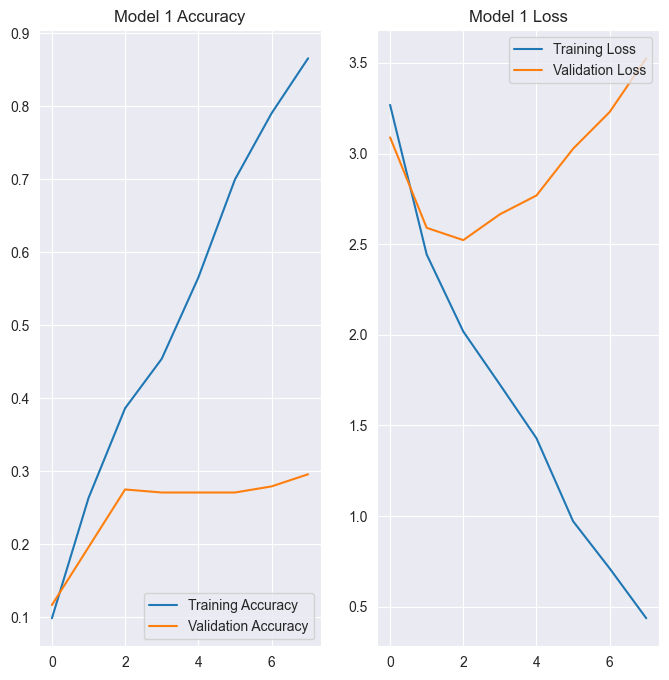

In [8]:
# Evaluate Model 1
def evaluate_model(model, data, name="Model"):
    print(f"\nEvaluating {name}...")
    y_pred_probs = model.predict(data)
    y_pred = np.argmax(y_pred_probs, axis=1)
    
    y_true = []
    for images, labels in data:
        y_true.extend(labels.numpy())
    y_true = np.array(y_true)
    
    acc = accuracy_score(y_true, y_pred)
    return acc, y_true, y_pred
    

acc_1, y_true_1, y_pred_1 = evaluate_model(model, data_test, name="Model 1")
    
print("\n" + "="*40)
print(f"       MODEL 1 ACCURACY: {acc_1:.4f}       ")
print("="*40)
    
# Detailed Report for Model 1
print("\nClassification Report for CNN Model 1:", classification_report(y_true_1, y_pred_1, target_names=data_cat))
    
# Plot Confusion Matrix for Model 1
cm_1 = confusion_matrix(y_true_1, y_pred_1)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', cbar=False,
xticklabels=data_cat, yticklabels=data_cat)
plt.title(f'Confusion Matrix - Model 1 (Acc: {acc_1:.4f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
    
# Plot Training History Model 1
epochs_range = range(len(history.history['accuracy']))
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Model 1 Accuracy')
    
plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model 1 Loss')
plt.show()

In [9]:
# Custom CNN_Model_2
import pandas as pd
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.callbacks import ReduceLROnPlateau

model_2 = Sequential([
    layers.Rescaling(1.0 / 255, input_shape=(img_width, img_height, 3)),
    
    # Block 1
    layers.Conv2D(32, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Block 2
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Block 3
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Block 4
    layers.Conv2D(256, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(len(data_cat))
])

model_2.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

epochs_size = 20 # Increased epochs slightly for better convergence
print("\n--- Starting Model 2 Training (VGG-Style + GAP) ---")

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=6,
    verbose=1,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_model_custom_cnn_2.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history_2 = model_2.fit(data_train, 
                        validation_data=data_val, 
                        epochs=epochs_size, 
                        batch_size=32, 
                        callbacks=[early_stopping, reduce_lr, model_checkpoint])


--- Starting Model 2 Training (VGG-Style + GAP) ---
Epoch 1/20


D:\Anaconda\envs\pytorch310\lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.1735 - loss: 3.0630
Epoch 1: val_accuracy improved from None to 0.07917, saving model to best_model_custom_cnn_2.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 23s 330ms/step - accuracy: 0.2500 - loss: 2.5944 - val_accuracy: 0.0792 - val_loss: 3.8107 - learning_rate: 0.0010
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.4804 - loss: 1.7684
Epoch 2: val_accuracy did not improve from 0.07917
64/64 ━━━━━━━━━━━━━━━━━━━━ 24s 373ms/step - accuracy: 0.4750 - loss: 1.7728 - val_accuracy: 0.0500 - val_loss: 4.2444 - learning_rate: 0.0010
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.6339 - loss: 1.2862
Epoch 3: val_accuracy did not improve from 0.07917
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 638ms/step - accuracy: 0.6039 - loss: 1.3488 - val_accuracy: 0.0667 - val_loss: 4.3028 - learning_rate: 0.0010
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 583ms/step - accuracy: 0.7153 - loss: 0.9789
Epoch 4: ReduceLROnPlateau reducing lear


Evaluating Model 2...
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

       MODEL 2 ACCURACY: 0.3667       

Classification Report for CNN Model 2:
                precision    recall  f1-score   support

        apple       0.33      0.38      0.35         8
       banana       0.40      0.25      0.31         8
     beetroot       0.31      0.50      0.38         8
  bell pepper       0.00      0.00      0.00         8
      cabbage       0.25      0.75      0.38         8
       carrot       0.43      0.38      0.40         8
  cauliflower       0.38      0.38      0.38         8
chilli pepper       0.50      0.12      0.20         8
     cucumber       0.30      0.38      0.33         8
     eggplant       1.00      0.12      0.22         8
       garlic       0.29      0.62      0.40         8
       ginger       0.20      0.12      0.15         8
       grapes       0.50      0.50      0.50         8
         kiwi       0.38      0.38      0.38         8
        lemon       0.22      0.

D:\Anaconda\envs\pytorch310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Anaconda\envs\pytorch310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Anaconda\envs\pytorch310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


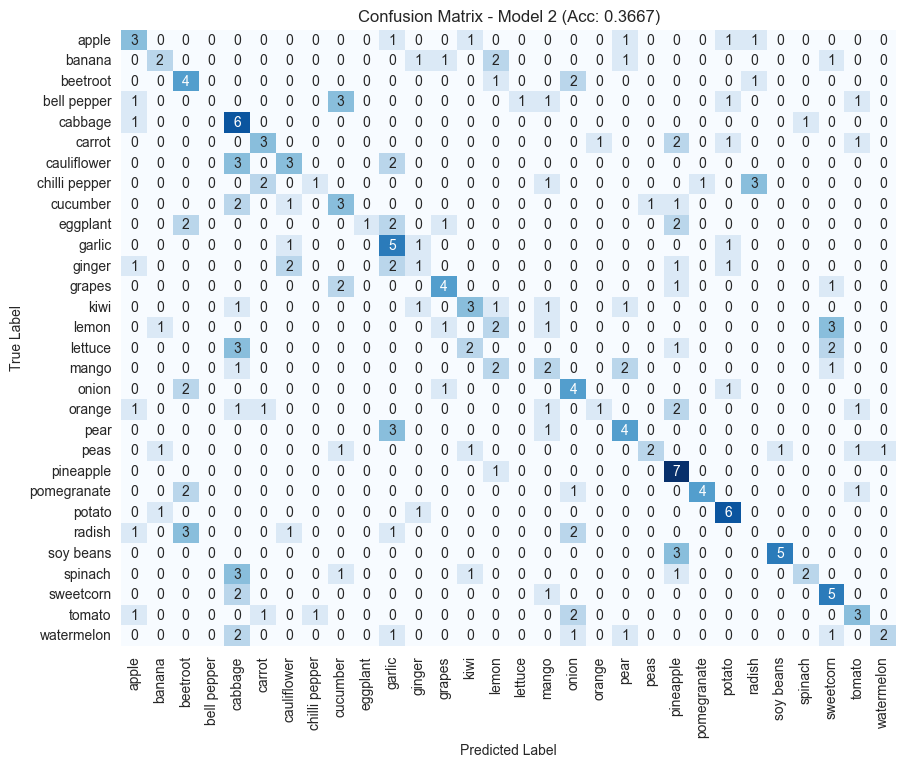

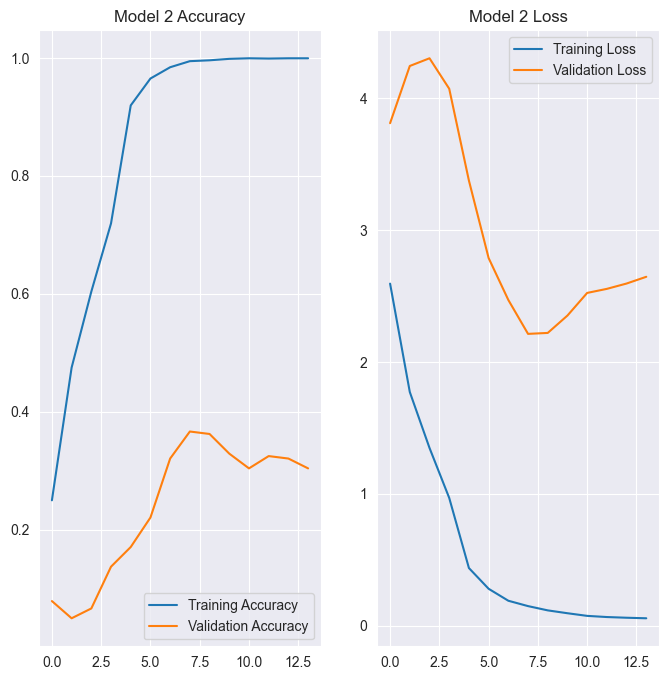

In [11]:
# Evaluate Model 2
def evaluate_model(model, data, name="Model"):
    print(f"\nEvaluating {name}...")
    y_pred_probs = model.predict(data)
    y_pred = np.argmax(y_pred_probs, axis=1)
    
    y_true = []
    for images, labels in data:
        y_true.extend(labels.numpy())
    y_true = np.array(y_true)
    
    acc = accuracy_score(y_true, y_pred)
    return acc, y_true, y_pred

acc_2, y_true_2, y_pred_2 = evaluate_model(model_2, data_test, name="Model 2")

print("\n" + "="*40)
print(f"       MODEL 2 ACCURACY: {acc_2:.4f}       ")
print("="*40)

# Detailed Report for Model 2
print("\nClassification Report for CNN Model 2:\n", classification_report(y_true_2, y_pred_2, target_names=data_cat))

# Plot Confusion Matrix for Model 2
cm_2 = confusion_matrix(y_true_2, y_pred_2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=data_cat, yticklabels=data_cat)
plt.title(f'Confusion Matrix - Model 2 (Acc: {acc_2:.4f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot Training History Model 2
epochs_range = range(len(history_2.history['accuracy']))
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history_2.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history_2.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Model 2 Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history_2.history['loss'], label='Training Loss')
plt.plot(epochs_range, history_2.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model 2 Loss')
plt.show()

In [20]:
# VGG19 Model
base_model = VGG19(
    input_shape=(img_width, img_height, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model_vgg = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(data_cat),activation='softmax')
])

# 5. compile
model_vgg.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Set up callbacks
vgg_early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=5,
                                   verbose=1,
                                   restore_best_weights=True)

vgg_checkpoint = ModelCheckpoint(
    'vgg19_model.keras',  # <-- This is the final file you need
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

epochs_size = 15

# 6. train
history_vgg = model_vgg.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs_size,
    batch_size=32,
    callbacks=[vgg_early_stopping, vgg_checkpoint]
)


Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0366 - loss: 12.8930
Epoch 1: val_accuracy improved from None to 0.05417, saving model to vgg19_model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.0431 - loss: 10.9594 - val_accuracy: 0.0542 - val_loss: 8.8232
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0777 - loss: 7.6520
Epoch 2: val_accuracy improved from 0.05417 to 0.11667, saving model to vgg19_model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.0912 - loss: 7.0987 - val_accuracy: 0.1167 - val_loss: 6.3636
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1417 - loss: 5.5629
Epoch 3: val_accuracy improved from 0.11667 to 0.18333, saving model to vgg19_model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.1681 - loss: 5.1548 - val_accuracy: 0.1833 - val_loss: 5.1357
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 875ms/step - accuracy: 0.2586 - loss: 4.1408
Epoch 4: val_accuracy improved from 0.18333 to 0

Evaluating VGG19 Model...

Generating predictions...
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 847ms/step

       VGG19 MODEL ACCURACY: 0.5167       

Classification Report for VGG19 Model:
               precision    recall  f1-score   support

        apple       0.10      0.12      0.11         8
       banana       0.45      0.62      0.53         8
     beetroot       0.38      0.38      0.38         8
  bell pepper       0.67      0.25      0.36         8
      cabbage       0.60      0.75      0.67         8
       carrot       0.67      0.50      0.57         8
  cauliflower       0.62      0.62      0.62         8
chilli pepper       0.44      0.50      0.47         8
     cucumber       0.56      0.62      0.59         8
     eggplant       0.50      0.38      0.43         8
       garlic       0.40      0.25      0.31         8
       ginger       0.75      0.75      0.75         8
       grapes       0.71      0.62      0.67         8
         kiwi       0.78      0.88      0.82         

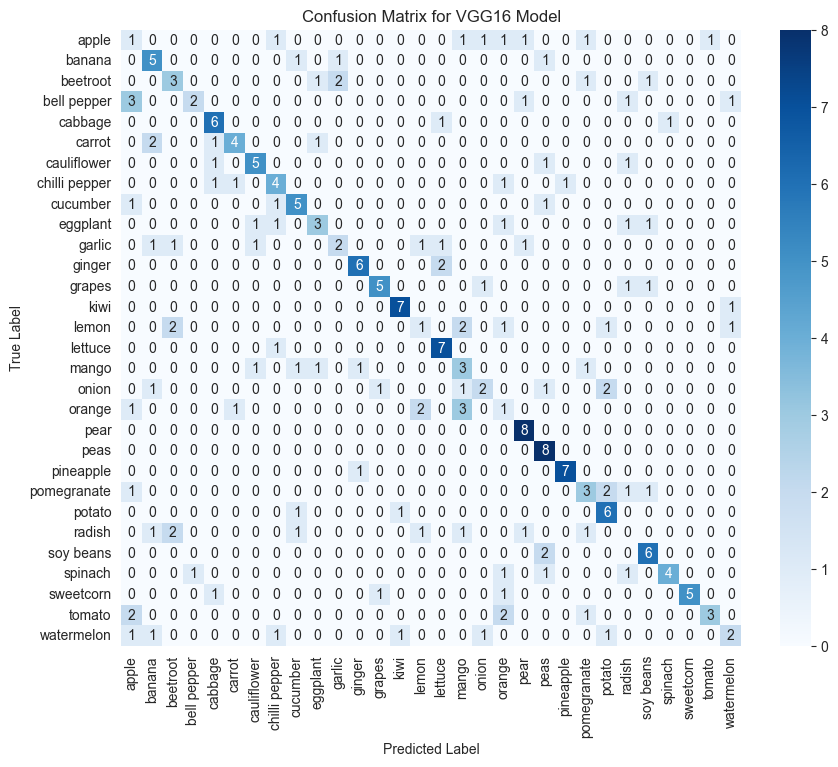

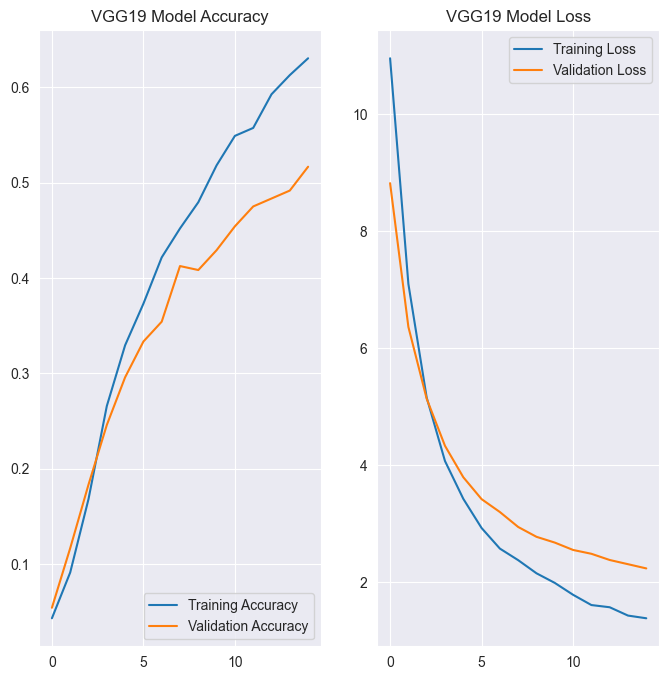

In [66]:
# Evaluate VGG19
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the test set
print("Evaluating VGG19 Model...")

# Get predictions for the test set
print("\nGenerating predictions...")
y_pred_probs = model_vgg.predict(data_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get true labels
y_true = []
for images, labels in data_test:
    y_true.extend(labels.numpy())
y_true = np.array(y_true)

# Calculate Accuracy
accuracy = np.mean(y_pred == y_true)
print("\n" + "="*40)
print(f"       VGG19 MODEL ACCURACY: {accuracy:.4f}       ")
print("="*40)
# Classification Report (includes weighted avg)
print("\nClassification Report for VGG19 Model:")
print(classification_report(y_true, y_pred, target_names=data_cat))
cm = confusion_matrix(y_true, y_pred)
# Confusion Matrix
print("\nConfusion Matrix for VGG19 Model:")

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data_cat,
            yticklabels=data_cat)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for VGG16 Model')
plt.show()

# Plot Training History VGG19
epochs_range = range(len(history_vgg.history['accuracy']))
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history_vgg.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('VGG19 Model Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history_vgg.history['loss'], label='Training Loss')
plt.plot(epochs_range, history_vgg.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('VGG19 Model Loss')
plt.show()

In [10]:
# Compare all model
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import gc

# Define model list
model_files = {
    "Custom CNN 1": "best_model_custom_cnn.keras",
    "Custom CNN 2": "best_model_custom_cnn_2.keras",
    "VGG19 Transfer": "vgg19_model.keras"
}

results = []

print("Resetting test data...")
test_dataset = data_test  # works because your dataset is tf.data.Dataset
# No need to reset like ImageDataGenerator

y_true = []
for batch in test_dataset:
    y_true.extend(batch[1].numpy())
y_true = np.array(y_true)

for model_name, file_path in model_files.items():

    print(f"\n--- Evaluating: {model_name} ---")

    if not os.path.exists(file_path):
        print(f"❌ Model file missing: {file_path}")
        results.append({"Model Name": model_name, "Test Accuracy": "File Missing"})
        continue

    try:
        # Load model safely
        model = tf.keras.models.load_model(file_path)
        print(f"✓ Loaded model file: {file_path}")

        loss, accuracy = model.evaluate(test_dataset, verbose=0)
        acc_percent = accuracy * 100

        print(f"Test Accuracy: {acc_percent:.2f}%")

        results.append({"Model Name": model_name, "Test Accuracy": acc_percent})

        del model
        gc.collect()
        tf.keras.backend.clear_session()

    except Exception as e:
        print(f"❌ ERROR evaluating {model_name}: {e}")
        results.append({"Model Name": model_name, "Test Accuracy": "Error"})

# Convert to DataFrame
summary_df = pd.DataFrame(results)

print("\n\n===== Performance Comparison Summary =====")
print(summary_df.to_string(index=False))

# Recommend best model
valid_results = [r for r in results if isinstance(r["Test Accuracy"], (int, float, np.float64))]

if valid_results:
    best_model = max(valid_results, key=lambda x: x["Test Accuracy"])
    print("\n===== Model Recommendation =====")
    print(f"👍 Best Performing Model: {best_model['Model Name']}")
    print(f"   Test Accuracy: {best_model['Test Accuracy']:.2f}%")

    if "VGG" in best_model["Model Name"]:
        print("\n💡 Transfer learning proved most effective for this classification task.")
    elif "ResNet" in best_model["Model Name"]:
        print("\n💡 ResNet-based transfer learning yielded strong generalization.")
    else:
        print("\n💡 Your custom architecture actually outperformed others — great regional optimization!")
else:
    print("⚠ No valid results — check file paths or model loading errors.")


Resetting test data...

--- Evaluating: Custom CNN 1 ---
✓ Loaded model file: best_model_custom_cnn.keras
Test Accuracy: 24.58%

--- Evaluating: Custom CNN 2 ---
✓ Loaded model file: best_model_custom_cnn_2.keras
Test Accuracy: 36.67%

--- Evaluating: VGG19 Transfer ---
✓ Loaded model file: vgg19_model.keras
Test Accuracy: 51.67%


===== Performance Comparison Summary =====
    Model Name  Test Accuracy
  Custom CNN 1      24.583334
  Custom CNN 2      36.666667
VGG19 Transfer      51.666665

===== Model Recommendation =====
👍 Best Performing Model: VGG19 Transfer
   Test Accuracy: 51.67%

💡 Transfer learning proved most effective for this classification task.


In [5]:

# Final Application
image_path = 'chilli.jpg'
img = tf.keras.utils.load_img(image_path, target_size=(img_width, img_height))
img_arr = tf.keras.utils.img_to_array(img)
img_bat = tf.expand_dims(img_arr, axis=0)

cnn_model   = tf.keras.models.load_model('best_model_custom_cnn.keras')
cnn_model_2 = tf.keras.models.load_model('best_model_custom_cnn_2.keras')
vgg_model   = tf.keras.models.load_model('vgg19_model.keras')

pred_cnn   = cnn_model.predict(img_bat)
pred_cnn2  = cnn_model_2.predict(img_bat)
pred_vgg   = vgg_model.predict(img_bat)

idx_cnn  = np.argmax(pred_cnn)
idx_cnn2 = np.argmax(pred_cnn2)
idx_vgg  = np.argmax(pred_vgg)

print(f'Custom CNN   predicts: {data_cat[idx_cnn]}')
print(f'Custom CNN2  predicts: {data_cat[idx_cnn2]}')
print(f'VGG19        predicts: {data_cat[idx_vgg]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Custom CNN   predicts: onion
Custom CNN2  predicts: apple
VGG19        predicts: chilli pepper
